In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')


# import numpy as np, h5py
# import scipy.io

# import numpy as np, h5py


import scipy.io
import hdf5storage  as hdf5

# # import augmentation
# # first set of experiments had 412:
# np.random.seed(412)
# np.random.seed(105)
set_nb_theme('monokai')

/Users/xz186023/Desktop/assignment1/.env/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


w/ pretraining auc 0.700447486180574
w/o pretraining auc 0.6449065543564095


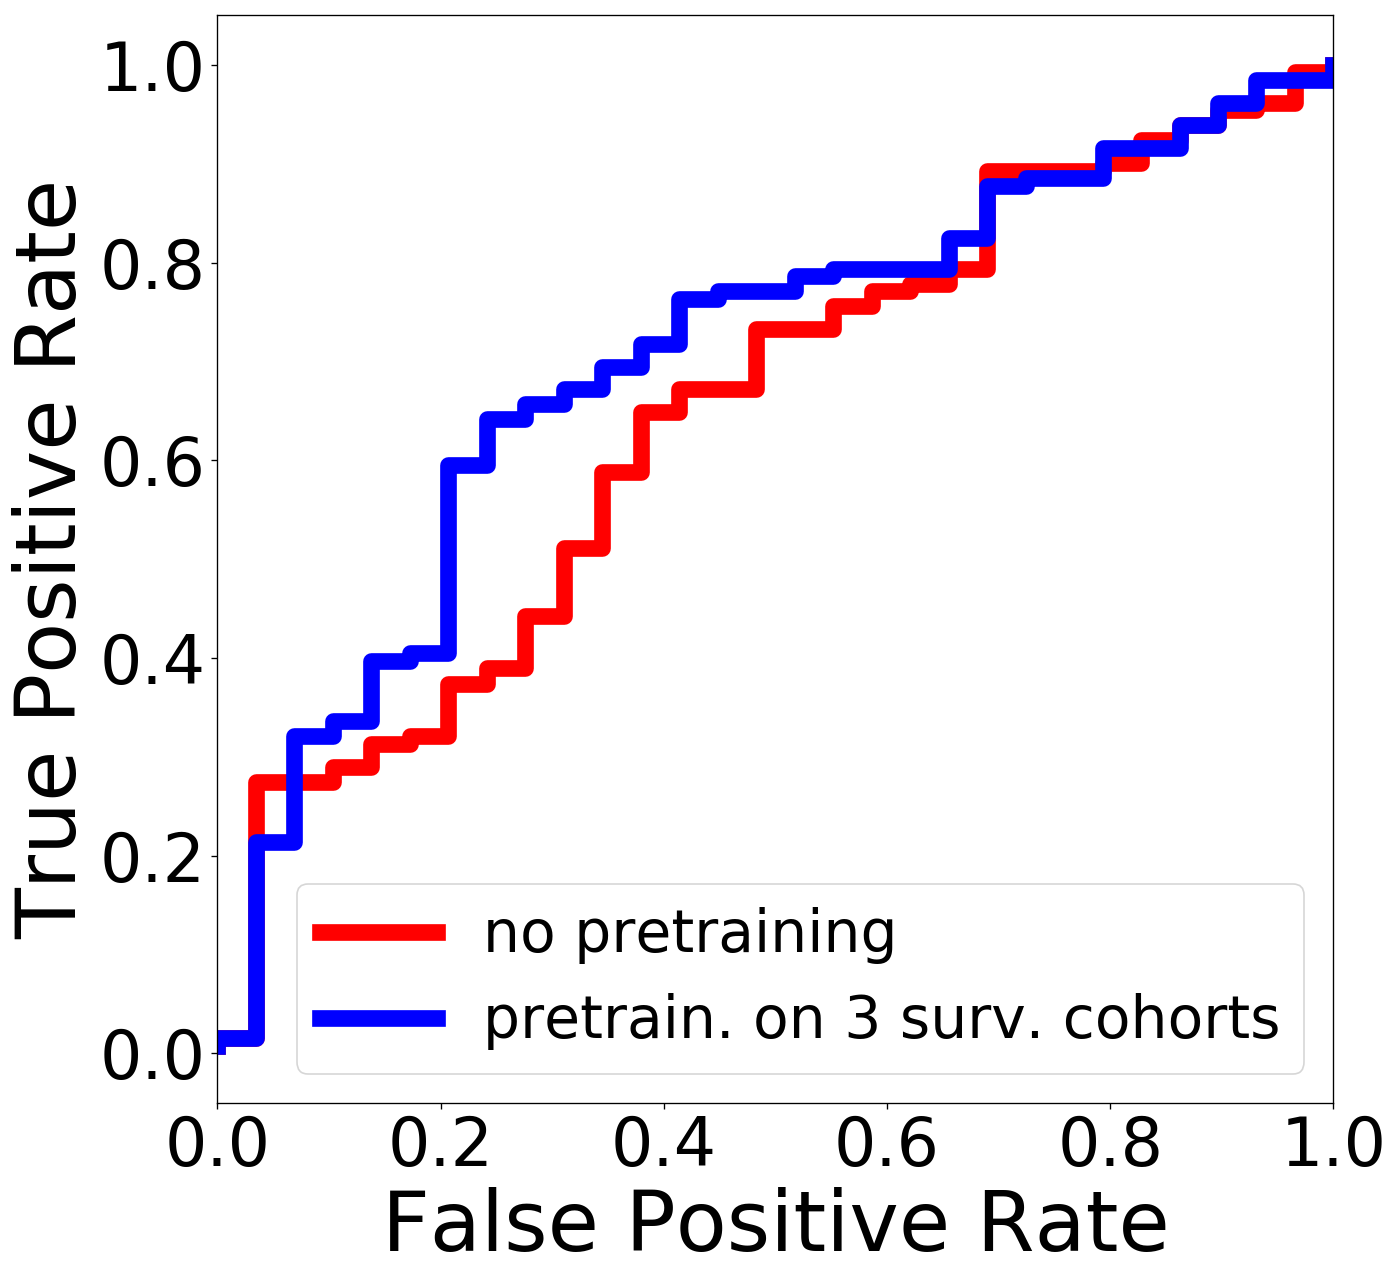

In [4]:
import numpy as np
import determine_roc as d
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
import numpy as np
import determine_roc as d
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

colors = ['darkorange']


plt.rcParams.update({'font.size': 35})
plt.rc('xtick',labelsize=40)
plt.rc('ytick',labelsize=40)


fig=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')

import scipy.io
num = 2
mat = scipy.io.loadmat('10fold_accsTrue' + str(num) + '.mat')
mat_false1 = scipy.io.loadmat('10fold_accsFalse' + str(num) + '.mat')

x = mat
y1 = mat_false1
 

 
i = 1
preds_tot = x['logits_kfold'+str(i)].squeeze()[:,1]
labels_tot = x['labels_kfold'+str(i)].squeeze() 
preds_tot_1 = y1['logits_kfold'+str(i)].squeeze()[:,1]
labels_tot_1 = y1['labels_kfold'+str(i)].squeeze() 


fpr, tpr, _ = roc_curve(labels_tot, preds_tot)
fpr_1, tpr_1, _ = roc_curve(labels_tot_1, preds_tot_1)

roc_auc = auc(fpr, tpr)
roc_auc_1 = auc(fpr_1, tpr_1)

lw = 2
i += 7
plt.plot(fpr_1, tpr_1, color='r',
         lw=lw, label='no pretraining',
         linewidth=10.0)


plt.plot(fpr, tpr, color='b',
         lw=lw, label='pretrain. on 3 surv. cohorts',
         linewidth=10.0)

 



print("w/ pretraining auc", roc_auc)
print("w/o pretraining auc", roc_auc_1)
plt.legend( prop={'size': 50})

plt.xlim([0.0, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=50)
plt.ylabel('True Positive Rate', fontsize=50)
plt.title('')
plt.legend(loc="lower right")

plt.show()
